In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/whitequalitywinefinale/winequality-white.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [3]:
# Additional imports that we required as we moved further on 
from sklearn.utils import shuffle

In [4]:
df = pd.read_csv('../input/whitequalitywinefinale/winequality-white.csv')

In [5]:
# We had to first seperate the data into the various columns using excel, as they were in one column and we were 
# not getting the desired dataframe with the appropriate columns
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [8]:
# Task 1 a and b, we can see there are 4898 rows and 12 columns and the information about each has been laid out
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [9]:
white_wine = shuffle(df, random_state=42)

In [10]:
# Task 1 c
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4656,6.0,0.29,0.41,10.8,0.048,55.0,149.0,0.99370,3.09,0.59,10.966667,7
3659,5.4,0.53,0.16,2.7,0.036,34.0,128.0,0.98856,3.20,0.53,13.200000,8
907,7.1,0.25,0.39,2.1,0.036,30.0,124.0,0.99080,3.28,0.43,12.200000,8
4352,7.3,0.28,0.35,1.6,0.054,31.0,148.0,0.99178,3.18,0.47,10.700000,5
3271,6.5,0.32,0.34,5.7,0.044,27.0,91.0,0.99184,3.28,0.60,12.000000,7


<AxesSubplot:xlabel='chlorides', ylabel='pH'>

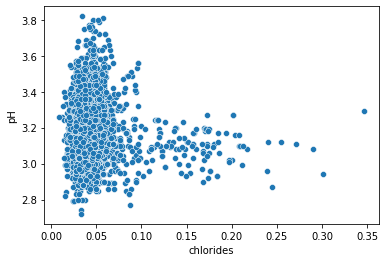

In [11]:
# Task 1 d
sns.scatterplot(data=df,x="chlorides",y="pH")

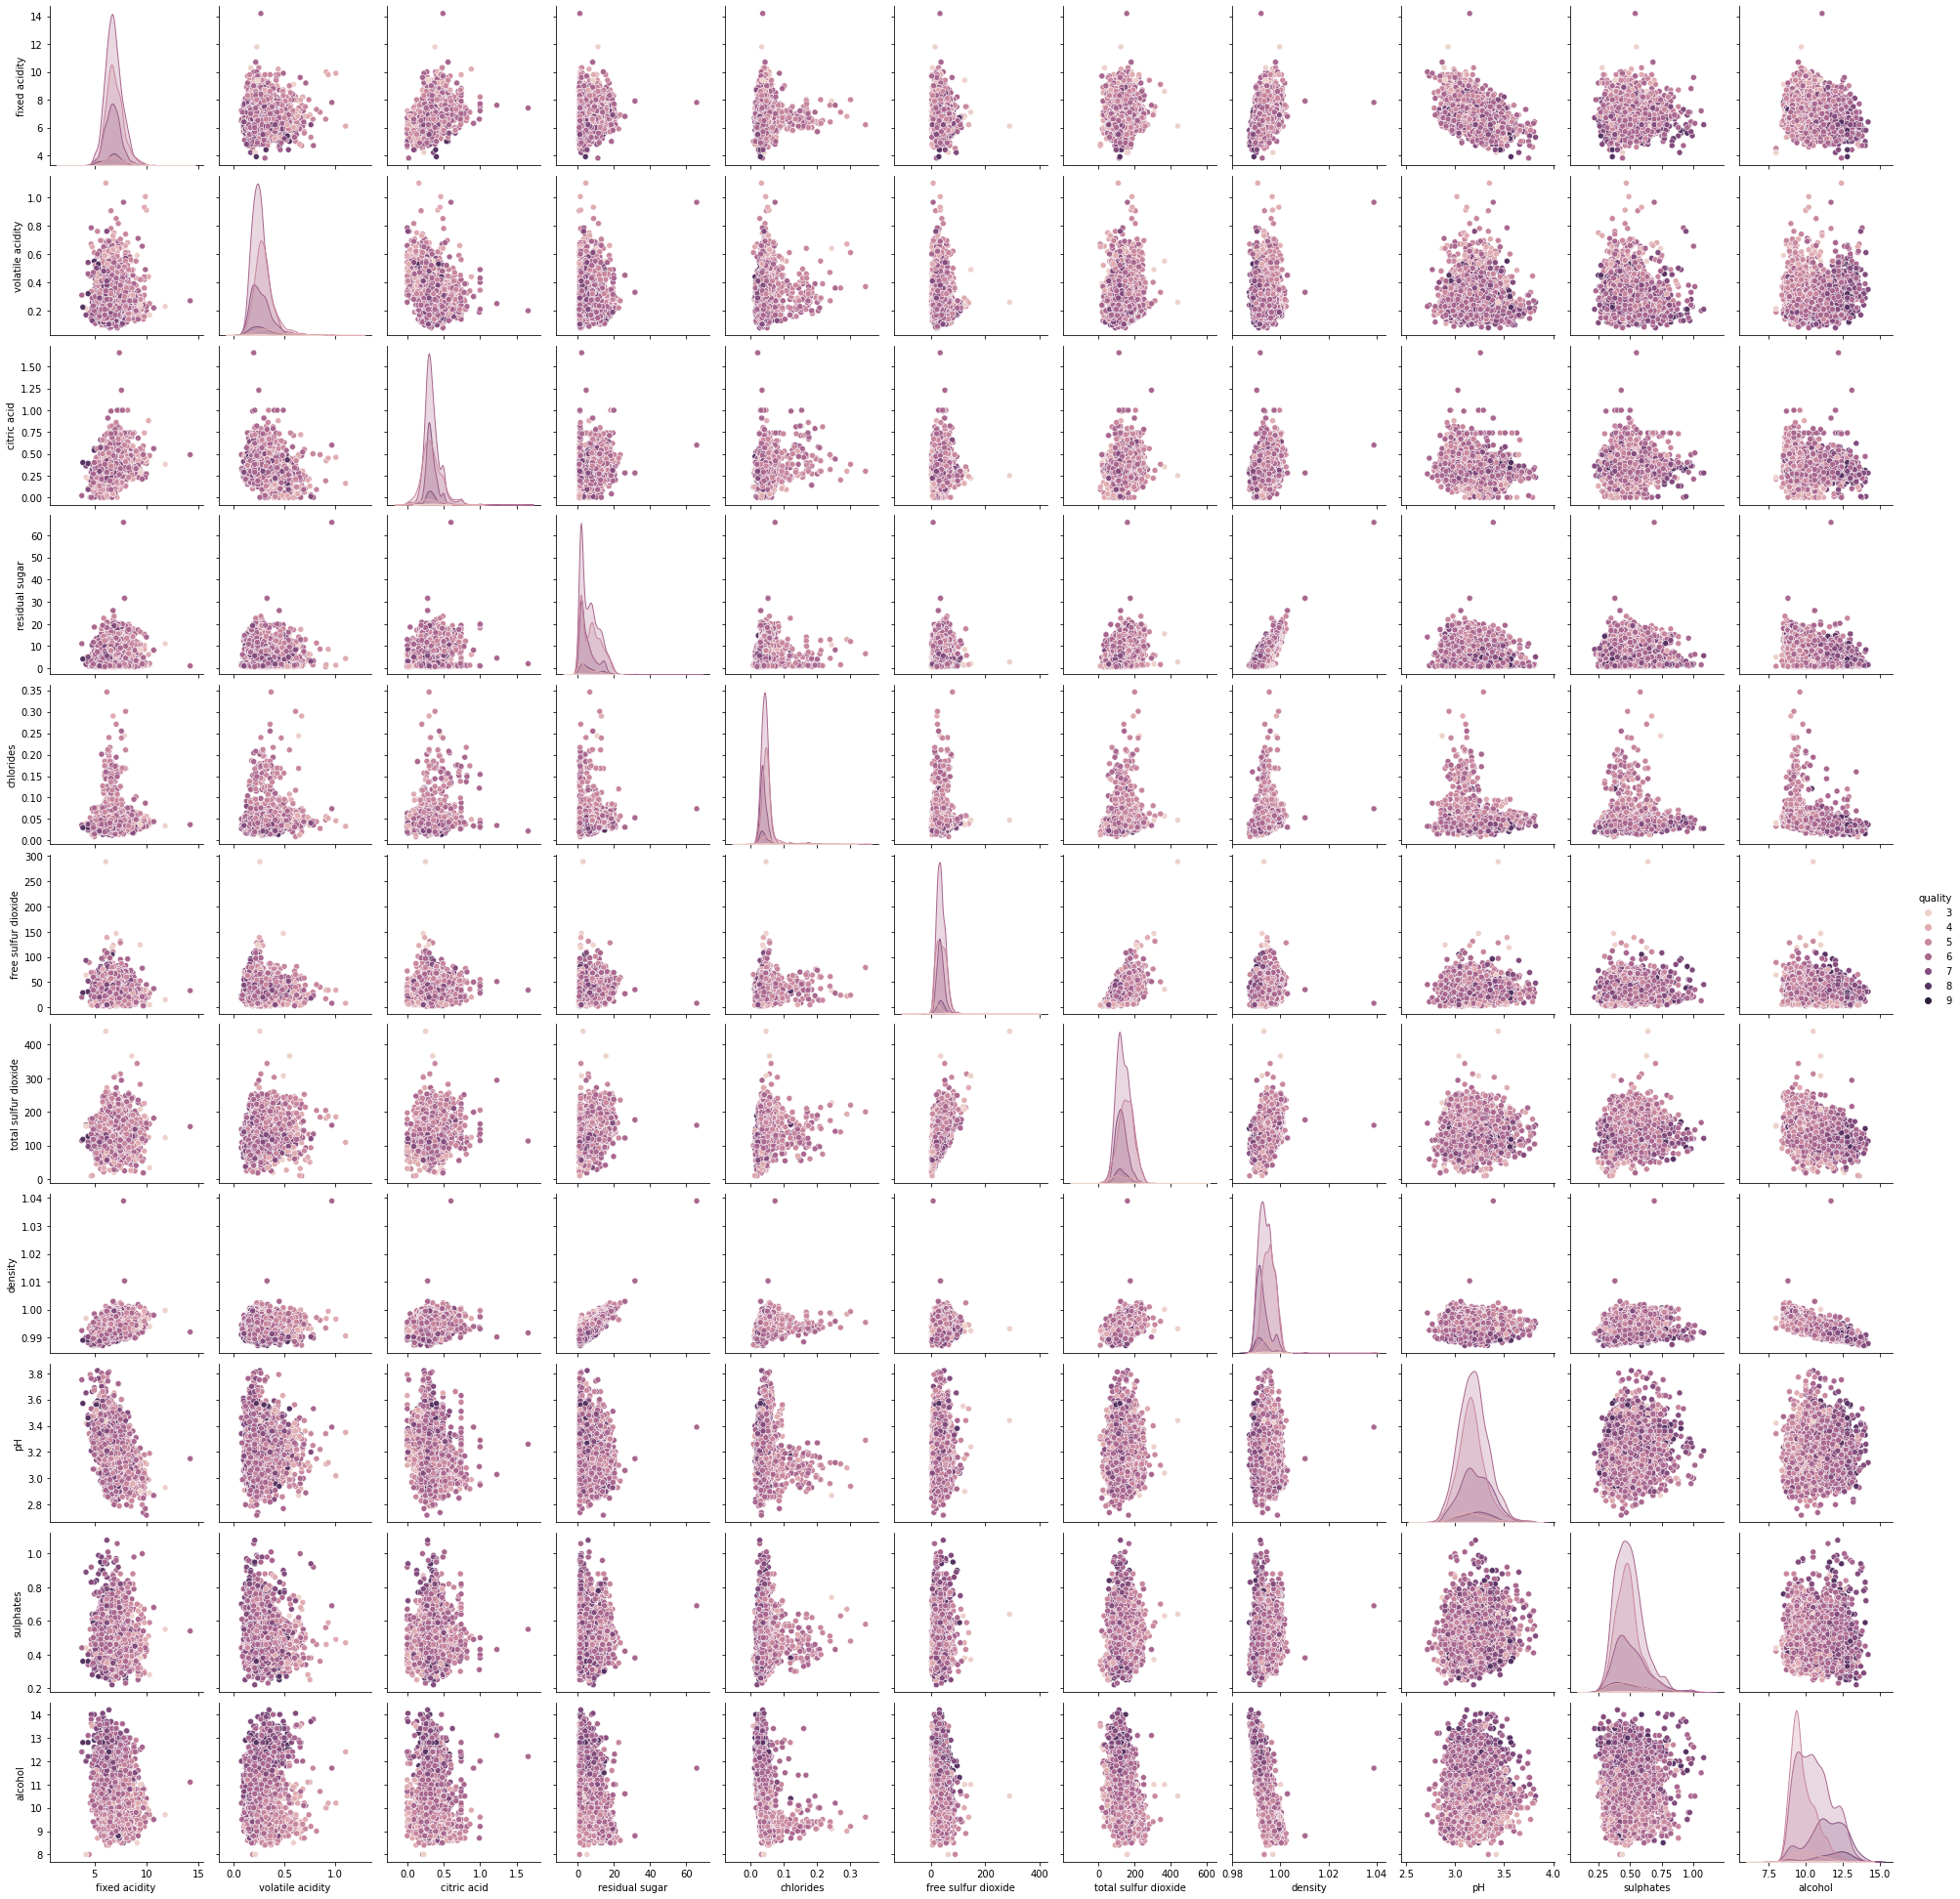

In [12]:
# An additional pairplot has been provided for better visualization of the data
sns.pairplot(df, hue="quality")

In [13]:
# Task 2a 
# The task has mentioned to perform pca analysis on the whole white wine dataset, We will assume that it means on all the features
# of the white wine data set and we will set n_components = 2, as PC1 and PC2 have been mentioned

from sklearn.preprocessing import StandardScaler

features = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]

X = white_wine.loc[:,features].values
y = white_wine.loc[:,["quality"]].values

scaler = StandardScaler()
scaler.fit(X)

feature_standard = scaler.transform(X)

In [14]:
feature_standard

array([[-1.01304317,  0.11667379,  0.6264779 , ..., -0.6508363 ,
         0.87765711,  0.36765663],
       [-1.72412724,  2.49799805, -1.4395106 , ...,  0.077712  ,
         0.35186795,  2.18264446],
       [ 0.29061097, -0.28021359,  0.46119882, ...,  0.60756531,
        -0.52444731,  1.36996334],
       ...,
       [ 0.88318104, -0.0817699 ,  1.53551285, ..., -1.11445795,
         0.35186795,  0.71981845],
       [-0.65750113, -0.37943543, -0.36519658, ..., -0.12098299,
        -0.96260494,  0.06967355],
       [ 1.4757511 , -0.0817699 ,  0.13064066, ...,  0.21017533,
         1.22818321, -0.09286267]])

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 2)
principalComponents = pca.fit_transform(feature_standard)

pc_df = pd.DataFrame(data= principalComponents, columns=["PC1", "PC2"])

In [16]:
pc_df.head()

,PC1,PC2
0,0.679493,0.592295
1,-2.878143,1.589423
2,-1.829024,-0.340174
3,-0.656818,-0.464668
4,-1.670980,0.358213


In [17]:
final_df = pd.concat([pc_df,white_wine["quality"]], axis = 1)

In [18]:
final_df.head()

,PC1,PC2,quality
0,0.679493,0.592295,6
1,-2.878143,1.589423,6
2,-1.829024,-0.340174,6
3,-0.656818,-0.464668,6
4,-1.670980,0.358213,6


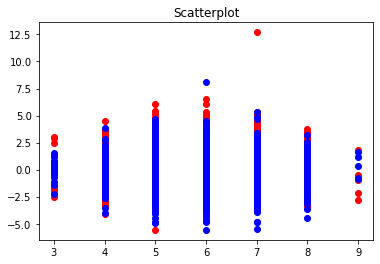

In [19]:
plt.scatter( x = final_df["quality"], y = final_df["PC1"],color = "red")
plt.scatter(x = final_df["quality"],y = final_df["PC2"] ,color = "blue")
plt.title("Scatterplot")
plt.show()

In [20]:
# Task 2 c
pca.explained_variance_ratio_

array([0.29293217, 0.14320363])

In [21]:
# Task 3 a,b,c
validation = white_wine[0:1000]
test= white_wine[-1001:-1]
train = white_wine[1001:3898]

In [22]:
validation.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,6.812900,0.273930,0.340670,6.198100,0.046093,36.165000,139.810000,0.993876,3.183470,0.49115,10.530377,5.903000
std,0.837439,0.098056,0.125832,4.798768,0.022754,18.164959,44.230258,0.002858,0.153898,0.11672,1.237898,0.882252
min,3.900000,0.080000,0.000000,0.700000,0.014000,2.000000,9.000000,0.987220,2.800000,0.25000,8.000000,3.000000
25%,6.200000,0.210000,0.270000,1.700000,0.036000,24.000000,110.000000,0.991680,3.080000,0.41000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.000000,0.042000,35.000000,134.000000,0.993680,3.170000,0.48000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.562500,0.050000,47.000000,168.000000,0.996000,3.270000,0.55000,11.400000,6.000000
max,14.200000,0.760000,0.990000,22.600000,0.244000,289.000000,440.000000,1.001000,3.800000,1.01000,14.000000,8.000000


In [23]:
test.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,6.855100,0.279725,0.332030,6.486100,0.046229,35.544000,139.67850,0.994074,3.189060,0.484620,10.495133,5.845000
std,0.806067,0.098773,0.117692,4.978803,0.022019,17.074164,43.22088,0.002939,0.149206,0.108523,1.231390,0.894301
min,4.200000,0.100000,0.000000,0.600000,0.016000,3.000000,19.00000,0.987940,2.720000,0.230000,8.000000,3.000000
25%,6.400000,0.220000,0.270000,1.800000,0.036000,23.000000,108.00000,0.991800,3.090000,0.410000,9.400000,5.000000
50%,6.800000,0.270000,0.310000,5.700000,0.044000,34.000000,136.00000,0.993835,3.180000,0.470000,10.300000,6.000000
75%,7.300000,0.320000,0.380000,9.800000,0.051000,47.000000,170.00000,0.996025,3.280000,0.540000,11.400000,6.000000
max,10.000000,1.100000,1.230000,31.600000,0.301000,146.500000,307.50000,1.010300,3.820000,0.980000,14.050000,9.000000


In [24]:
train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,2897.000000,2897.000000,2897.000000,2897.000000,2897.000000,2897.000000,2897.000000,2897.000000,2897.000000,2897.000000,2897.000000,2897.000000
mean,6.868709,0.279185,0.332810,6.422799,0.045510,34.923369,137.386607,0.994062,3.189682,0.491084,10.515730,5.880221
std,0.858347,0.102371,0.120503,5.193480,0.021472,16.561819,41.611502,0.003052,0.150646,0.115117,1.228208,0.882894
min,3.800000,0.080000,0.000000,0.600000,0.009000,3.000000,10.000000,0.987110,2.770000,0.220000,8.400000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991700,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.100000,0.043000,33.000000,134.000000,0.993720,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.330000,0.390000,10.000000,0.050000,45.000000,166.000000,0.996200,3.280000,0.550000,11.400000,6.000000
max,11.800000,1.005000,1.660000,65.800000,0.346000,131.000000,313.000000,1.038980,3.810000,1.080000,14.200000,9.000000
